In [1]:
#!pip install opencv-python

In [2]:
import numpy as np
import os
import cv2
from scipy import ndimage

from zipfile import ZipFile
from scipy.fft import fft, fftshift, fft2, ifft2, ifftshift


%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [75]:
def dilatacion(img, k):
    t, umbralizada = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    kernel = np.ones((k, k), np.uint8)
    dilatacion = cv2.dilate(img, kernel, iterations = 1)
    plt.imshow(dilatacion, cmap="gray")
    return dilatacion


In [50]:
file_name='Image.zip' #Llamamos el archivo ZIP donde están nuestras imágenes faltantes de máscara para entrenamiento.

with ZipFile(file_name, 'r') as zip:  #Sacamos la imagen
    zip.extractall(path='image', members=None,)
    zip.close()

In [51]:
img= 'image'
jpeglist = os.listdir(img)

In [87]:
output_images_path="contour"
if not os.path.exists(output_images_path):
    os.makedirs(output_images_path)

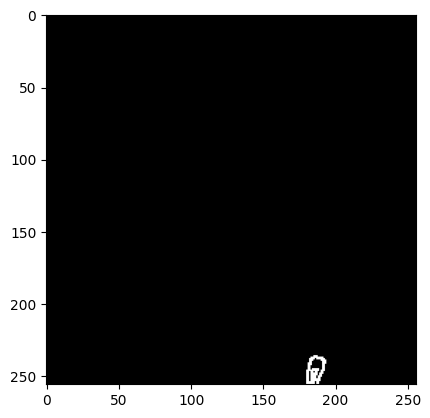

In [91]:
for file in jpeglist:

    img_path= img + "/" + file
    image= cv2.imread(img_path, 0)

    if image is None:
        continue

    edged = cv2.Canny(image, 10, 100)
    edged= dilatacion(edged, 3)

    ### Para convertirlo a rojo: 
    # contours, _= cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # edged= cv2.cvtColor(edged, cv2.COLOR_GRAY2RGB) 
    # final= cv2.drawContours (edged, contours, -1, (0,0,255), -1)

    cv2.imwrite(output_images_path + "/" + str(file) + ".jpg", edged) # Cambiar "edged" por "final" de obtener una máscara roja.

    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [89]:
file_name='contour' # Nombre del directorio que se guardará en zip

with ZipFile(file_name+'.zip', 'w') as zip: # Crear documento con extensión '.zip' y seleccionar que puede escribirse en él ('w')
    for file in os.listdir(file_name): # Loop por cada documento en el directorio a comprimir.
        zip.write(os.path.join(file_name, file)) # Escribir cada uno de los documentos en el Zip
    zip.close() # Cerrar el documento de Zip-+.